In [2]:
from sympy.solvers import solve
from sympy import *
from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np

In [140]:
x = Symbol('x')
solve(-12*x**4*sin(cos(x)), x)

[0, pi/2, 3*pi/2, 2*pi - acos(pi), acos(pi)]

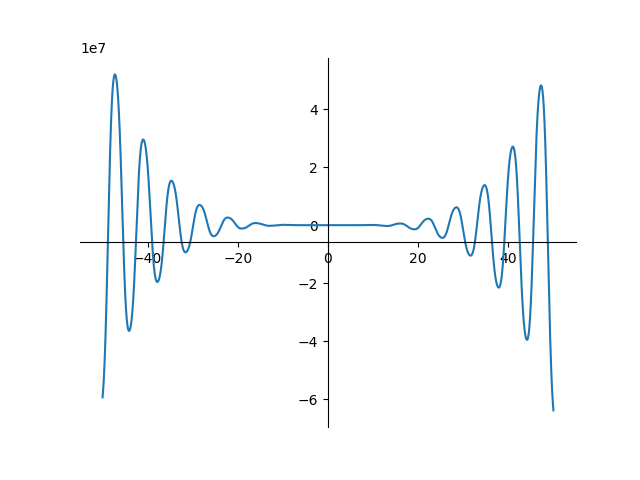

In [42]:
# строим график
y = lambda x: -12*x**4*np.sin(np.cos(x))-18*x**3+5*x**2+10*x-30

fig, ax = plt.subplots()
x = np.linspace(-50,50,100000)

p = plt.plot(x, y(x))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [31]:
# Ищем минимумы/максимумы
points_of_y = [y(x) for x in np.linspace(-50,50,100000)] # набор значений функции на заданном диапазоне
max_point = max(points_of_y) # максимум на диапазоне
min_point = min(points_of_y) # минимум на диапазоне
print(max_point, min_point)

51982204.7526755 -63889247.8989142


In [32]:
# Ищем интервалы возрастания/убывания функции. Пофиг, что неоптимально. Точность зависит от кол-ва точек.
# Если производная в точке больше 0, то функция растет. И наоборот.
# Каждый промежуток включает первое значение и не включает второе. Так и проще и нагляднее.

# производные функции в точках, взятых для построения:
list_of_deriative = [derivative(y, h) for h in np.linspace(-50,50,100000)]
# словарь "точка х: значение производной":
dict_point_deriative = dict(zip(np.linspace(-50,50,100000), list_of_deriative))

list_of_increase = []
segment = []
for key in dict_point_deriative:
    if dict_point_deriative[key] > 0 and len(segment) == 0:
        segment.append(key)
    if dict_point_deriative[key] < 0 and len(segment) == 1:
        segment.append(key)
        list_of_increase.append([segment[0].round(2), segment[1].round(2)])
        segment.clear()
        
list_of_decrease = []
for key in dict_point_deriative:
    if dict_point_deriative[key] < 0 and len(segment) == 0:
        segment.append(key)
    if dict_point_deriative[key] > 0 and len(segment) == 1:
        segment.append(key)
        list_of_decrease.append([segment[0].round(2), segment[1].round(2)])
        segment.clear()
print(f'Функция возрастает на промежутках: {list_of_increase}')
print()
print(f'Функция убывает на промежутках: {list_of_decrease}')

Функция возрастает на промежутках: [[-50.0, -47.19], [-44.04, -40.91], [-37.77, -34.64], [-31.5, -28.38], [-25.23, -22.13], [-18.98, -15.9], [-12.74, -9.75], [-6.53, -3.87], [1.16, 3.38], [6.74, 9.64], [12.81, 15.86], [19.01, 22.11], [25.25, 28.37], [31.51, 34.63], [37.78, 40.91], [44.05, 47.18]]

Функция убывает на промежутках: [[-47.19, -44.04], [-40.91, -37.77], [-34.64, -31.5], [-28.38, -25.23], [-22.13, -18.98], [-15.9, -12.74], [-9.75, -6.53], [-3.87, 1.16], [3.38, 6.74], [9.64, 12.81], [15.86, 19.01], [22.11, 25.25], [28.37, 31.51], [34.63, 37.78], [40.91, 44.05]]


In [46]:
# ищем интервалы, где y(x) > 0 и где y(x) < 0.
# в целом, тоже самое, что и прошлая задачка. Если я конечно не накосячил с математикой. А я могу.

points_of_y2 = [y(x) for x in np.linspace(-50,50,100000)]
dict_x_y = dict(zip(np.linspace(-50,50,100000), points_of_y2))

list_of_above_zero = []
segment = []
for key in dict_x_y:
    if dict_x_y[key] > 0 and len(segment) == 0:
        segment.append(key)
    if dict_x_y[key] < 0 and len(segment) == 1:
        segment.append(key)
        list_of_above_zero.append([segment[0].round(2), segment[1].round(2)])
        segment.clear()
        
list_of_below_zero = []
for key in dict_x_y:
    if dict_x_y[key] < 0 and len(segment) == 0:
        segment.append(key)
    if dict_x_y[key] > 0 and len(segment) == 1:
        segment.append(key)
        list_of_below_zero.append([segment[0].round(2), segment[1].round(2)])
        segment.clear()
        
print(f'Функция имеет значение больше 0 на промежутках: {list_of_above_zero}')
print()
print(f'Функция имеет значение меньше 0 на промежутках: {list_of_below_zero}')

Функция имеет значение больше 0 на промежутках: [[-48.72, -45.52], [-42.45, -39.23], [-36.17, -32.94], [-29.89, -26.65], [-23.63, -20.34], [-17.37, -14.03], [-11.13, -7.65], [-5.03, -1.34], [2.27, 4.38], [8.04, 10.86], [14.24, 17.19], [20.49, 23.5], [26.76, 29.8], [33.03, 36.09], [39.31, 42.38], [45.59, 48.66]]

Функция имеет значение меньше 0 на промежутках: [[-50.0, -48.72], [-45.52, -42.45], [-39.23, -36.17], [-32.94, -29.89], [-26.65, -23.63], [-20.34, -17.37], [-14.03, -11.13], [-7.65, -5.03], [-1.34, 2.27], [4.38, 8.04], [10.86, 14.24], [17.19, 20.49], [23.5, 26.76], [29.8, 33.03], [36.09, 39.31], [42.38, 45.59]]
